In [0]:
from skimage.color import rgb2gray
import numpy as np
import cv2
import matplotlib.pyplot as plt
from PIL import Image, ImageOps
%matplotlib inline
from scipy import ndimage

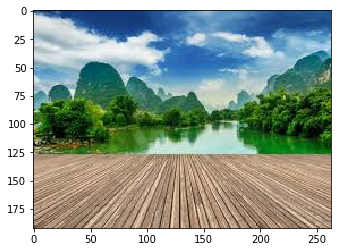

In [0]:
#In directory of image, display image
from IPython.display import Image
image=plt.imread('landscape2.jpeg')
image.shape
plt.imshow(image)

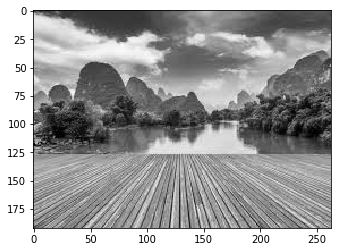

In [0]:
#convert to grayscale
gray = rgb2gray(image)
plt.imshow(gray, cmap='gray')

In [0]:
#get shape of image
gray.shape

(192, 263)

In [0]:
#take the mean of the pixel valusd  and use that as a threshold (based off of shape from picture)
#If pixel valus is more than threshold, belongs to object. If less than the threshold then it belongs to background
gray_r = gray.reshape(gray.shape[0]*gray.shape[1])
for i in range(gray_r.shape[0]):
    if gray_r[i] > gray_r.mean():
        gray_r[i] = 1
    else:
        gray_r[i] = 0
gray = gray_r.reshape(gray.shape[0],gray.shape[1])


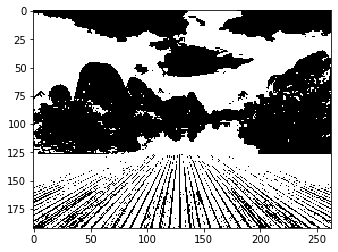

In [0]:
plt.imshow(gray, cmap='gray')

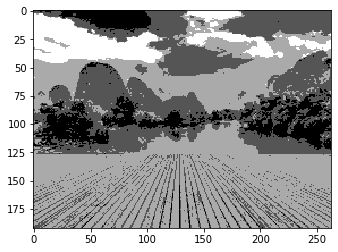

In [0]:
#Dark region represents background and brighter represents foreground

gray = rgb2gray(image)
gray_r = gray.reshape(gray.shape[0]*gray.shape[1])
for i in range(gray_r.shape[0]):
    if gray_r[i] > gray_r.mean():
        gray_r[i] = 3
    elif gray_r[i] > 0.5:
        gray_r[i] = 2
    elif gray_r[i] > 0.25:
        gray_r[i] = 1
    else:
        gray_r[i] = 0
gray = gray_r.reshape(gray.shape[0],gray.shape[1])
plt.imshow(gray, cmap='gray')

In [0]:
#Take the weight matrix
#Put it on top of the image
#Perform element-wise multiplication and get the output
#Move the weight matrix as per the stride chosen
#Convolve until all the pixels of the input are used

(192, 263, 3)


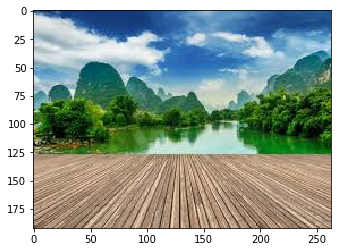

In [0]:
#Check dimensions of image -- going into K-Means
pic = plt.imread('landscape2.jpeg')/255
print(pic.shape)
plt.imshow(pic)

In [0]:
#convert 3D image of shape to 2D
pic_n = pic.reshape(pic.shape[0]*pic.shape[1], pic.shape[2])
pic_n.shape

(50496, 3)

In [0]:
#reshape array and obtain clusters the cluster centers function of k-means will return cluster centers and give labels 
#for each pixel (tell which pixel of image belongs to which cluster)
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, random_state=0).fit(pic_n)
pic2show = kmeans.cluster_centers_[kmeans.labels_]

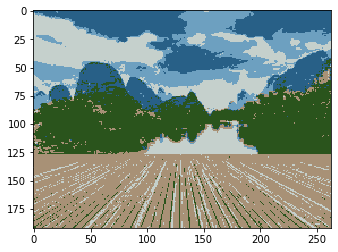

In [0]:
#5 clusters were chosen for this, but number can be adjusted
cluster_pic = pic2show.reshape(pic.shape[0], pic.shape[1], pic.shape[2])
plt.imshow(cluster_pic)